K-means clustering is unsupervised machine learning algorithm used to partition a dataset into a set of distinct, non-overlapping groups or clusters. The goal of K-means is to group similar data points together based on their features.

**What we want to achive ?**
-> **segement the coustomer based on RFM so that the company can target its customer efficiently**

**R(Recency):Number of days since last purchase means how a coustomer is recently purchasing
F(Frequency):Number of transactions means how frequently a customer is freqent
M(monetary):total amount of transaction(revenue contribute)**

import dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Data collection and analysis

In [ ]:
#loading the data from csv file to pandas dataframe
retail = pd.read_csv('/content/archive (1).zip',encoding = 'latin-1')# encoding = 'latin-1' is a character encoding standard that was designed to cover Western European languages. It includes characters such as accented letters (like é, ñ)

In [ ]:
retail.head()# will show the top 5 or mentioned column

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
retail.tail()# will show the bottom 5 or mentioned column

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [ ]:
retail.shape # will show the total row(541909) and column(8)

(541909, 8)

In [ ]:
retail.info() # will show the information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Data cleaning

In [ ]:
#retail.isnull().sum() / len(retail) * 100: Calculates the percentage of missing values for each column by dividing the count of null values by the total number of rows and multiplying by 100.round 2 means give round figure
df_null=(round(retail.isnull().sum()/len(retail)*100),2)
df_null

(InvoiceNo       0.0
 StockCode       0.0
 Description     0.0
 Quantity        0.0
 InvoiceDate     0.0
 UnitPrice       0.0
 CustomerID     25.0
 Country         0.0
 dtype: float64,
 2)

In [ ]:
#droping rows having missing value
retail.dropna()
retail.shape

(541909, 8)

In [ ]:
retail_customer = retail['CustomerID'].astype(str)
retail_customer

,CustomerID
0,17850.0
1,17850.0
2,17850.0
3,17850.0
4,17850.0
...,...
541904,12680.0
541905,12680.0
541906,12680.0
541907,12680.0


rfm_m = rfm_m.reset_index()=Index Reset: This operation resets the index of the DataFrame. The index is the label that identifies each row in the DataFrame. By default, Pandas assigns a numerical index starting from 0.

In [ ]:
#creating new attribute:monetray

retail['Amount']=retail['Quantity']*retail['UnitPrice']#to get the amount earn on units
rfm_m = retail.groupby('CustomerID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [ ]:
# creating new attribute : frequency
rfm_f = retail.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID','fequency']
rfm_f.head()

,CustomerID,fequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [ ]:
#merging the two dataframe rfm_m,rfm_f
rfm = pd.merge(rfm_m,rfm_f,on='CustomerID',how='inner')
rfm.head()

,CustomerID,Amount,fequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [ ]:
#new attribute : redency
#convrt to datetime to proper  datatype
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])
retail['InvoiceDate']

,InvoiceDate
0,2010-12-01 08:26:00
1,2010-12-01 08:26:00
2,2010-12-01 08:26:00
3,2010-12-01 08:26:00
4,2010-12-01 08:26:00
...,...
541904,2011-12-09 12:50:00
541905,2011-12-09 12:50:00
541906,2011-12-09 12:50:00
541907,2011-12-09 12:50:00


In [ ]:
#computintg the latest tansaction
max_date = max(retail['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [ ]:
retail['Diff'] = max_date  - retail['InvoiceDate']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [ ]:
rfm_p = retail.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [ ]:
#round figuring the day and removing the time section
rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [ ]:
# merge  the dataframe to get the final RFM dataframe
rfm = pd.merge(rfm, rfm_p, on = 'CustomerID', how='inner')
rfm.columns = ['CoustomerID','Amount','Frequency','Redencey']
rfm.head()

,CoustomerID,Amount,Frequency,Redencey
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


Text(0.5, 0, 'Attributes')

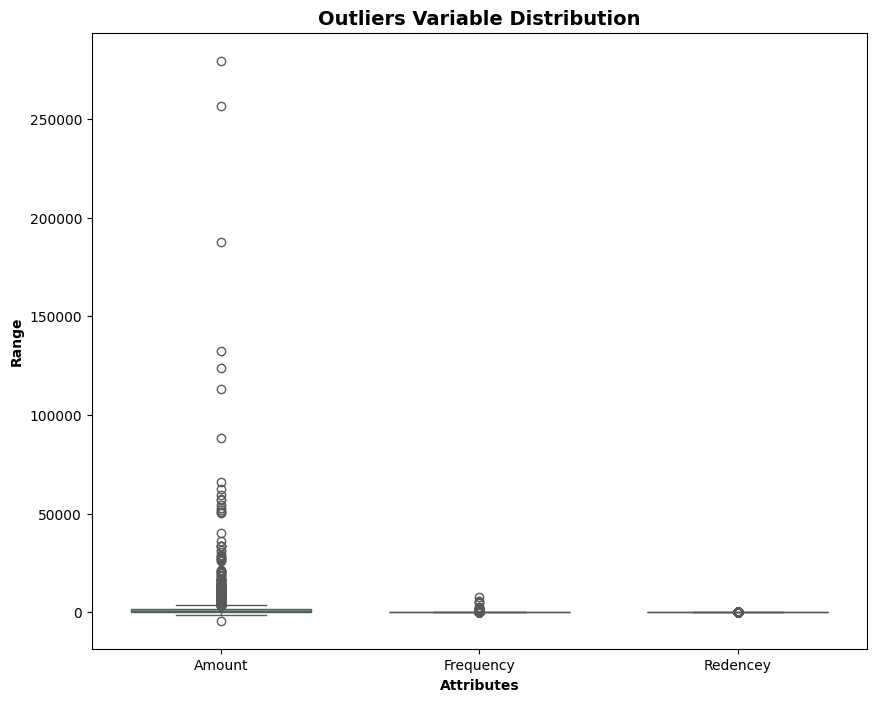

In [ ]:
#outlier analysis which means the wrong data
attributes = ['Amount','Frequency','Redencey']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes], orient = "v", palette = 'Set2',whis=1.5,saturation = 1,width = 0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')
#the horizontal line below all are outlier


removing the outlier

In [ ]:
#removing outlier for Amount
q1 = rfm.Amount.quantile(0.05)
q3 = rfm.Amount.quantile(0.95)
iqr = q3 - q1
rfm = rfm[(rfm.Amount >= q1 - 1.5*iqr) & (rfm.Amount <= q3 + 1.5*iqr)]

# removing outlier from frequency
q1 = rfm.Frequency.quantile(0.05)
q3 = rfm.Frequency.quantile(0.95)
iqr = q3 - q1
rfm = rfm[(rfm.Frequency >= q1 - 1.5*iqr) & (rfm.Frequency <= q3 + 1.5*iqr)]

#removing outlier from redencey
q1 = rfm.Redencey.quantile(0.05)
q3 = rfm.Redencey.quantile(0.95)
iqr = q3 - q1
rfm = rfm[(rfm.Redencey >= q1 - 1.5*iqr) & (rfm.Redencey <= q3 + 1.5*iqr)]


Scaling the features

In [ ]:
rfm_df = rfm[['Amount','Frequency','Redencey']]

#instantiate
scaler = StandardScaler()
scaler.fit(rfm_df)
rfm_df_scaled = scaler.transform(rfm_df)

rfm_df_scaled.shape

(4265, 3)

In [ ]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount','Frequency','Redencey']


Model building

In [ ]:
#k means with some orbitaryk makes clusters
kmeans = KMeans(n_clusters = 4, max_iter = 50)
kmeans.fit(rfm_df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(max_iter=50, n_clusters=4)

In [ ]:
#will assign the data to different clusters
kmeans.labels_

array([2, 0, 1, ..., 2, 1, 1], dtype=int32)

In [ ]:
set(kmeans.labels_)

{0, 1, 2, 3}

implementing elbow curve to get the right number of clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

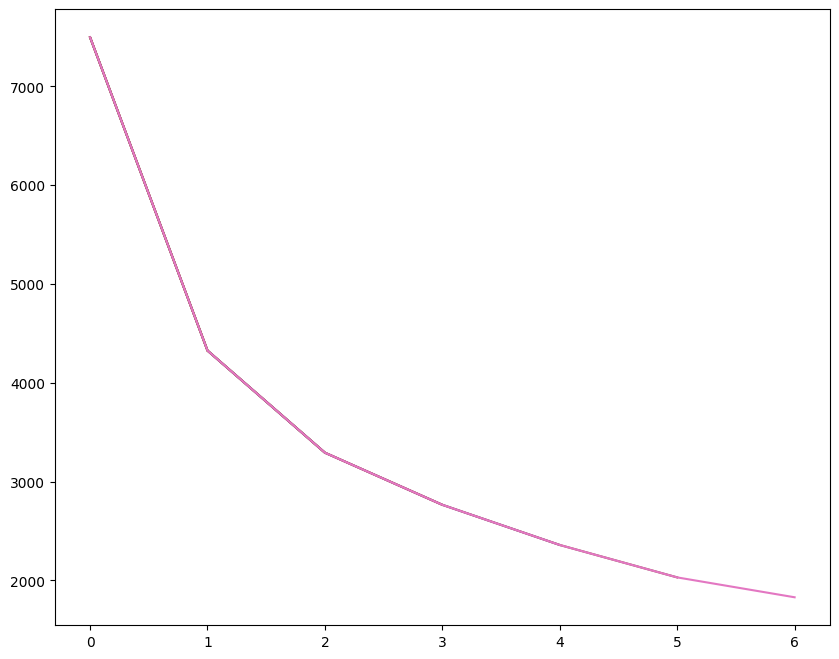

In [ ]:
ssd = []
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
  kmeans = KMeans(n_clusters = num_clusters, max_iter = 50)
  kmeans.fit(rfm_df_scaled)
  ssd.append(kmeans.inertia_)#inertia gives the cluster and give the gaps or elbow in points
  #plot the ssd for each n_cluster
  plt.plot(ssd)

In [ ]:
kmeans = KMeans(n_clusters = 3, max_iter = 300)
kmeans.fit(rfm_df_scaled)
#if the elbow is create the its right

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [ ]:
kmeans.labels_

array([1, 2, 0, ..., 1, 0, 0], dtype=int32)

In [ ]:
rfm['cluster_Id'] = kmeans.predict(rfm_df_scaled)
rfm.head()

,CoustomerID,Amount,Frequency,Redencey,cluster_Id
0,12346.0,0.00,2,325,1
1,12347.0,4310.00,182,1,2
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,1


<Axes: xlabel='cluster_Id', ylabel='Amount'>

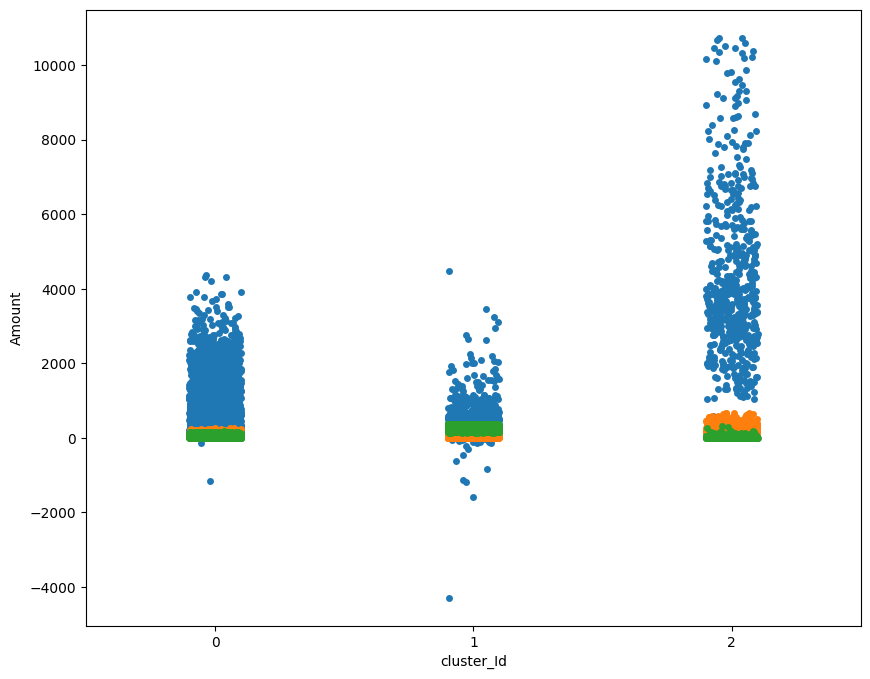

In [ ]:
sns.stripplot(x='cluster_Id',y='Amount',data=rfm)


<Axes: xlabel='cluster_Id', ylabel='Frequency'>

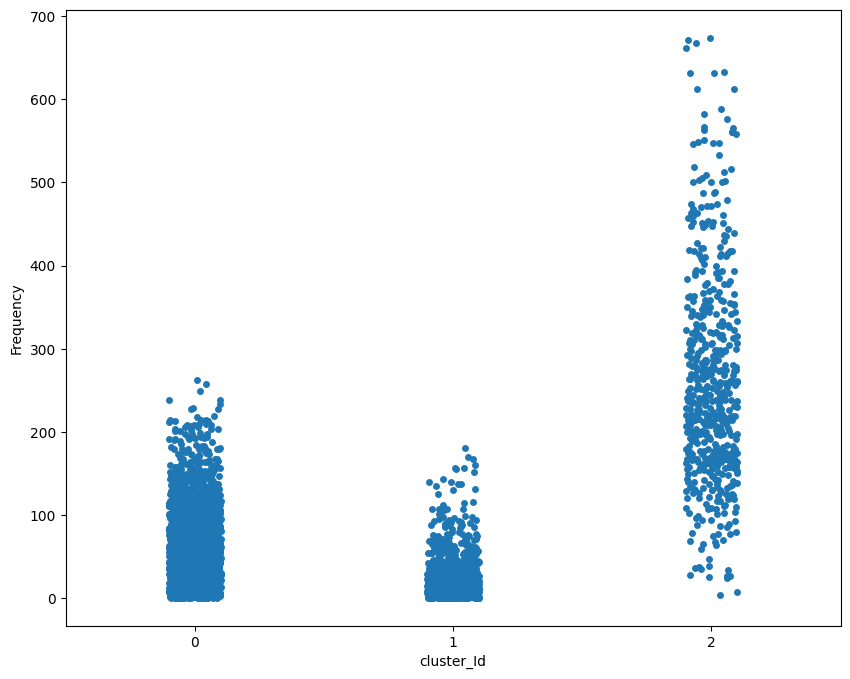

In [ ]:
sns.stripplot(x='cluster_Id',y='Frequency',data=rfm)

<Axes: xlabel='cluster_Id', ylabel='Redencey'>

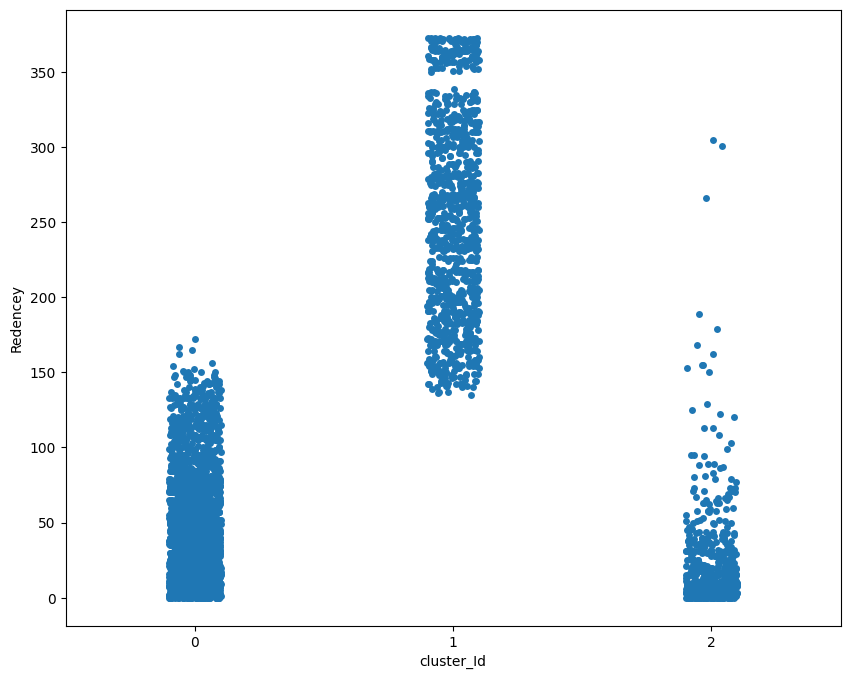

In [ ]:
sns.stripplot(x='cluster_Id',y='Redencey',data=rfm)

In [ ]:

#define filename for pickle files
filename = 'kmeans_model.pkl'
import pickle
#open file in write mode
with open ('kmeans_saved_model','wb') as file:
  pickle.dump(kmeans,file)# save kmeans model in files
  file.close()
  pickle.dump(kmeans,open('kmeans_model.pkl','wb'))